In [ ]:
import tensorflow as tf
print("GPU is available" if tf.config.list_physical_devices('GPU') else "GPU is NOT available")

GPU is NOT available


In [ ]:
import tensorflow as tf
print("GPU is available" if tf.config.list_physical_devices('GPU') else "GPU is NOT available")
from tensorflow.python.client import device_lib

# Display available devices
device_lib.list_local_devices()
import tensorflow as tf

# Check if TensorFlow is using GPU
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Make sure to set TensorFlow to use GPU if available
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("No GPU detected. TensorFlow will run on CPU.")

import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

from google.colab import drive
# Unmount Google Drive (if already mounted)
drive.flush_and_unmount()

# Mount Google Drive
drive.mount('/content/drive')



GPU is NOT available
Num GPUs Available:  0
No GPU detected. TensorFlow will run on CPU.
Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/Hannan/"
# %cd /content/drive/My Drive/
# dataset_path = '/content/drive/MyDrive/dataset'
%cd "/content/drive/My Drive/Hannan/"
data_dir = "/content/drive/My Drive/Hannan/seg neww/"  # Update to the correct path



 classification_model.h5   Keras_dataflow  'seg neww'
/content/drive/My Drive/Hannan


In [ ]:
import glob
import numpy as np
import cv2
list_of_files = glob.glob(data_dir + "*.png")
print(len(list_of_files))
save_path = "/content/drive/My Drive/Hannan/dataset/256/"
for image_file in list_of_files:
  mask_file = image_file.replace('.png', '_mask.png.npy')
  # Extract class label from the file name
  file_name = image_file.split("/")[-1].split(".")[0]

  label = int(file_name.split('_')[1])  # This extracts the class number from the file name

  # Read the image and mask
  image = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
  mask = np.load(mask_file)

  n_rows = image.shape[-2]
  n_cols = image.shape[-1]
  image_resized = cv2.resize(image[...,n_rows//2:n_rows,0:n_cols//2], (256, 256),interpolation=cv2.INTER_AREA)/ 255.0
  mask_resized = cv2.resize(mask[...,n_rows//2:n_rows,0:n_cols//2], (256, 256),interpolation=cv2.INTER_NEAREST) / 1.0

  cv2.imwrite(save_path+f"{file_name}.png",image_resized*255.0)
  cv2.imwrite(save_path+f"{file_name}_mask.png",mask_resized*255.0)
  print(f"file name: {file_name}, class = {label}, (w,h) = ({n_cols},{n_rows})")


489
file name: class_1_4, class = 1, (w,h) = (1470,1740)
file name: class_1_5, class = 1, (w,h) = (1470,1740)
file name: class_1_3, class = 1, (w,h) = (1470,1740)
file name: class_1_6, class = 1, (w,h) = (1470,1740)
file name: class_1_1, class = 1, (w,h) = (1470,1740)
file name: class_1_2, class = 1, (w,h) = (1470,1740)
file name: class_1_7, class = 1, (w,h) = (1470,1740)
file name: class_1_9, class = 1, (w,h) = (1470,1740)
file name: class_1_14, class = 1, (w,h) = (1470,1740)
file name: class_1_10, class = 1, (w,h) = (1470,1740)
file name: class_1_15, class = 1, (w,h) = (1470,1740)
file name: class_1_13, class = 1, (w,h) = (1470,1740)
file name: class_1_12, class = 1, (w,h) = (1470,1740)
file name: class_1_8, class = 1, (w,h) = (1470,1740)
file name: class_1_11, class = 1, (w,h) = (1470,1740)
file name: class_1_16, class = 1, (w,h) = (1470,1740)
file name: class_1_23, class = 1, (w,h) = (1470,1740)
file name: class_1_17, class = 1, (w,h) = (1470,1740)
file name: class_1_19, class = 1,

In [ ]:
# Lists to hold image and mask data
images = []
masks = []
labels = []
# Define the number of classes
num_classes = 6
# Iterate over files in the data directory
for file_name in os.listdir(data_dir):
    if file_name.startswith('class_') and file_name.endswith('.png') and 'mask' not in file_name:
        # Construct full file paths
        image_path = os.path.join(data_dir, file_name)
        mask_path = image_path.replace('.png', '_mask.png.npy')

        # Extract class label from the file name
        label = int(file_name.split('_')[1])  # This extracts the class number from the file name

        # Read the image and mask
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        mask = np.load(mask_path)


        # Check if image and mask files exist
        if image is not None and mask is not None:
            # Resize and normalize the image and mask
            #image_resized = cv2.resize(image, (128, 128))/ 255.0
            #mask_resized = cv2.resize(mask, (128, 128)) / 1.0
            n_rows = image.shape[-2]
            n_cols = image.shape[-1]
            image_resized = cv2.resize(image[...,n_rows//2:n_rows,0:n_cols//2], (256, 256),interpolation=cv2.INTER_AREA)/ 255.0
            mask_resized = cv2.resize(mask[...,n_rows//2:n_rows,0:n_cols//2], (256, 256),interpolation=cv2.INTER_NEAREST) / 1.0

            # Expand dimensions to add the channel
            image_expanded = np.expand_dims(image_resized, axis=-1)
            mask_expanded = np.expand_dims(mask_resized, axis=-1)

            # Append to lists
            images.append(image_expanded)
            masks.append(mask_expanded)
            labels.append(label)

# Convert to numpy arrays
images_np = np.array(images)
masks_np = np.array(masks)
labels_np = np.array(labels)

# One-hot encode labels if necessary for classification
labels_encoded = to_categorical(labels_np - 1, num_classes=num_classes)  # Subtract 1 if classes are 1-indexed

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images_np, labels_encoded, stratify=labels_encoded, test_size=0.1, random_state=42)
X_mask_train, X_mask_val = train_test_split(masks_np, stratify=labels_encoded, test_size=0.1, random_state=42)


In [ ]:
a = np.argmax(y_train, axis=1)
val,count = np.unique(a, return_counts=True)
print(len(a))
print(val)
print(count)
print(count / len(a))

a = np.argmax(y_val, axis=1)
val,count = np.unique(a, return_counts=True)
print(len(a))
print(val)
print(count)
print(count / len(a))

440
[0 1 2 3 4 5]
[131  57  66  66  78  42]
[0.29772727 0.12954545 0.15       0.15       0.17727273 0.09545455]
49
[0 1 2 3 4 5]
[15  6  7  7  9  5]
[0.30612245 0.12244898 0.14285714 0.14285714 0.18367347 0.10204082]


In [ ]:
# root_path = "/content/drive/My Drive/Hannan/Keras_dataflow/"
# i = 0
# for x,y in zip(X_val, y_val):
#   print(i, x.shape, np.argmax(y)+1)
#   cv2.imwrite(root_path+f"valid/{np.argmax(y)+1}/{i}.jpg",x*255)
#   i = i+1

In [ ]:
# root_path = "/content/drive/My Drive/Hannan/Keras_dataflow/"
# i = 0
# for x,y in zip(X_train, y_train):
#   print(i, x.shape, np.argmax(y)+1)
#   cv2.imwrite(root_path+f"train/{np.argmax(y)+1}/{i}.jpg",x*255)
#   i = i+1

In [ ]:
#mask_resized = cv2.resize(mask, (128, 128)) / 1.0
print(np.max(mask_resized))
print(image_resized.shape)
print(images_np.shape)

1.0
(256, 256)
(489, 256, 256, 1)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Create an ImageDataGenerator for data augmentation
data_gen = ImageDataGenerator(
    rotation_range=20,  # Rotate images randomly up to 20 degrees
    width_shift_range=0.2,  # Shift images horizontally by a fraction of the width
    height_shift_range=0.2,  # Shift images vertically by a fraction of the height
    shear_range=0.2,  # Shear intensity (shear angle in radians)
    zoom_range=0.2,  # Zoom in/out by a factor of 0.2
    horizontal_flip=True,  # Flip images horizontally
    vertical_flip=True,  # Flip images vertically
    fill_mode='nearest'  # Fill in missing pixels using the nearest available pixel
)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, Concatenate, UpSampling2D, Layer, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

# Define class weights
weight_for_0 = 1.  # Background
weight_for_1 = 2.  # Foreground

# Custom Weighted Binary Crossentropy Loss

# Custom Weighted Binary Crossentropy Loss
def weighted_binary_crossentropy(y_true, y_pred):
    y_true_float = K.cast(y_true, 'float32')  # Cast y_true to float32
    y_pred_float = K.cast(y_pred, 'float32')  # Cast y_pred to float32
    bce = K.binary_crossentropy(y_true_float, y_pred_float)
    weight_vector = y_true_float * weight_for_1 + (1. - y_true_float) * weight_for_0
    weighted_bce = weight_vector * bce
    return K.mean(weighted_bce)



# Dice Coefficient for metric
def dice_coefficient(y_true, y_pred, smooth=1e-6):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

# Dice Loss
def dice_loss(y_true, y_pred):
    return 1 - dice_coefficient(y_true, y_pred)

# Combined BCE and Dice Loss
def bce_dice_loss(y_true, y_pred):
    return weighted_binary_crossentropy(y_true, y_pred) + dice_loss(y_true, y_pred)

# InceptionV3 as encoder
def get_inception_encoder():
    base_model = InceptionV3(input_shape=[256, 256, 3], include_top=False, weights='imagenet')
    layer_names = [
        'mixed2',  # 35x35 output
        'mixed7',  # 17x17 output
        # You might add more layers here depending on the depth of your U-Net++
    ]
    layers = [base_model.get_layer(name).output for name in layer_names]

    down_stack = Model(inputs=base_model.input, outputs=layers)
    down_stack.trainable = False
    return down_stack

# U-Net++ Model with InceptionV3 as encoder
def UNetPlusPlusInception(input_shape=(256, 256, 3)):
    inputs = Input(shape=input_shape)
    encoder = get_inception_encoder()
    skips = encoder(inputs)
    x = skips[-1]

    # Upsampling layers
    up_stack = [
        UpSampling2D((2, 2)),  # Adjust these scales
        UpSampling2D((2, 2)),  # to match the down_stack output sizes
        # Possibly add more layers
    ]

    for up, skip in zip(up_stack, reversed(skips[:-1])):
        x = up(x)
        # Resize x to match skip's shape
        x = tf.image.resize(x, (skip.shape[1], skip.shape[2]))
        concat = Concatenate()
        x = concat([x, skip])

    # This is the last layer of the model
    x = UpSampling2D((2, 2))(x)  # Adjust this scale as needed
    x = Conv2DTranspose(filters=1, kernel_size=3, strides=(2,2), padding='same', activation='sigmoid', output_padding=(1,1))(x)  # Adjust strides or add output_padding if needed

    # Ensure the output shape matches the target mask shape exactly
    x = tf.image.resize(x, (256, 256))

    model = Model(inputs=inputs, outputs=x)
    model.compile(optimizer=Adam(learning_rate=0.001), loss=bce_dice_loss, metrics=[dice_coefficient])

    return model

# Assuming X_train, X_val, X_mask_train, and X_mask_val are already defined

# Function to convert grayscale images to RGB
def grayscale_to_rgb(images):
    return np.repeat(images, 3, axis=-1)

# Convert datasets
X_train_rgb = grayscale_to_rgb(X_train)
X_val_rgb = grayscale_to_rgb(X_val)

# Instantiate the model
model = UNetPlusPlusInception(input_shape=(256, 256, 3))

# Define callbacks
callbacks = [
    ModelCheckpoint('best_unetplusplus_inception_model.h5', verbose=1, save_best_only=True),
    EarlyStopping(patience=10, verbose=1)
]

# Train the model
history = model.fit(
    X_train_rgb, X_mask_train,
    validation_data=(X_val_rgb, X_mask_val),
    batch_size=10,  # Adjust according to your GPU capacity
    epochs=150,  # Adjust based on the convergence of your model
    callbacks=callbacks,
    verbose=1  # You might want to change the verbosity here
)

# Save the model
model.save('unetplusplus_inception_model.h5')


Epoch 1/150
43/44 [============================>.] - ETA: 0s - loss: 1.1300 - dice_coefficient: 0.2043
Epoch 1: val_loss improved from inf to 0.88092, saving model to best_unetplusplus_inception_model.h5
44/44 [==============================] - 11s 137ms/step - loss: 1.1244 - dice_coefficient: 0.2073 - val_loss: 0.8809 - val_dice_coefficient: 0.3367
Epoch 2/150
43/44 [============================>.] - ETA: 0s - loss: 0.7581 - dice_coefficient: 0.4219
Epoch 2: val_loss improved from 0.88092 to 0.67945, saving model to best_unetplusplus_inception_model.h5
44/44 [==============================] - 2s 51ms/step - loss: 0.7547 - dice_coefficient: 0.4241 - val_loss: 0.6794 - val_dice_coefficient: 0.4807
Epoch 3/150
43/44 [============================>.] - ETA: 0s - loss: 0.6169 - dice_coefficient: 0.5264
Epoch 3: val_loss improved from 0.67945 to 0.58826, saving model to best_unetplusplus_inception_model.h5
44/44 [==============================] - 2s 53ms/step - loss: 0.6157 - dice_coefficien

2/2 [==============================] - 6s 2s/step


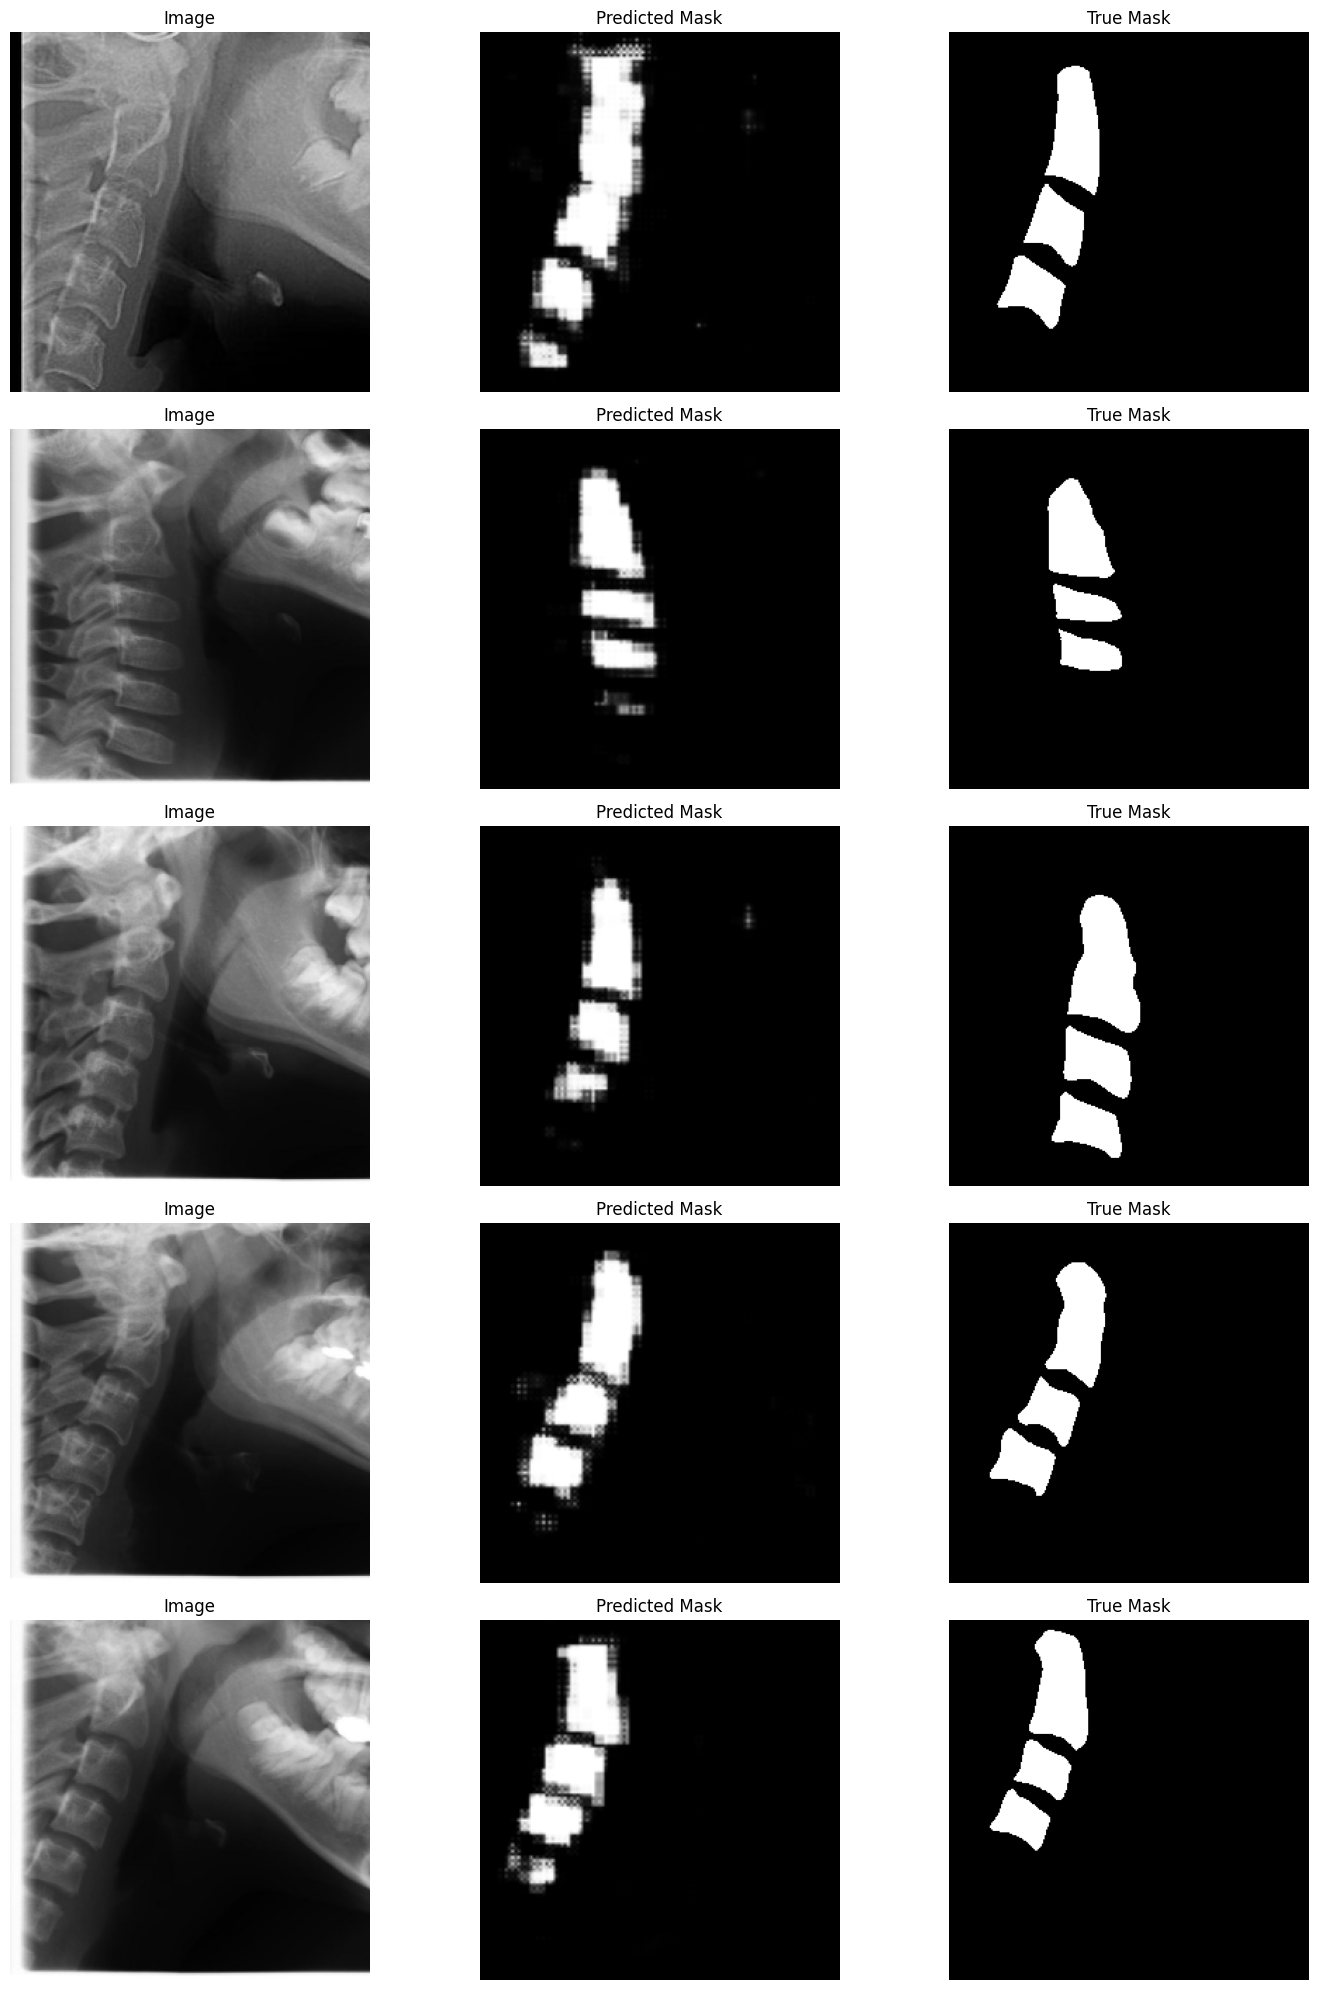

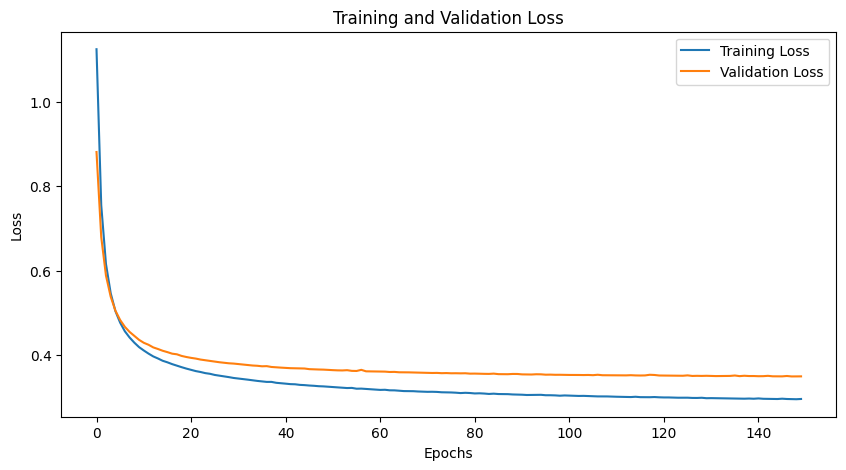

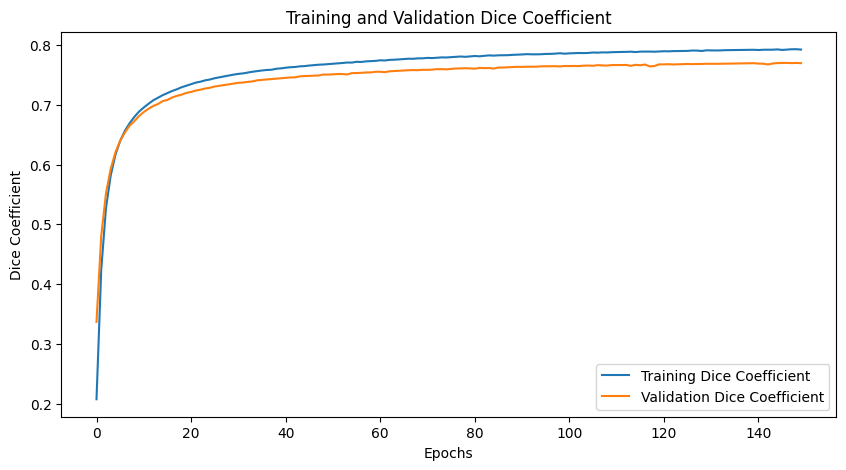

In [ ]:
import matplotlib.pyplot as plt

# Load the saved model
loaded_model = tf.keras.models.load_model('unetplusplus_inception_model.h5', custom_objects={'bce_dice_loss': bce_dice_loss, 'dice_coefficient': dice_coefficient})

# Predict masks on validation data
predicted_masks = loaded_model.predict(X_val_rgb)

# Visualize some predicted masks along with corresponding images and true masks
num_samples = 5  # Number of samples to visualize
fig, axes = plt.subplots(num_samples, 3, figsize=(15, 20))
for i in range(num_samples):
    axes[i, 0].imshow(X_val_rgb[i])
    axes[i, 0].set_title('Image')
    axes[i, 0].axis('off')

    axes[i, 1].imshow(predicted_masks[i].squeeze(), cmap='gray')
    axes[i, 1].set_title('Predicted Mask')
    axes[i, 1].axis('off')

    axes[i, 2].imshow(X_mask_val[i].squeeze(), cmap='gray')  # True mask
    axes[i, 2].set_title('True Mask')
    axes[i, 2].axis('off')

plt.tight_layout()
plt.show()

# Visualize training figures (loss and metrics)
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['dice_coefficient'], label='Training Dice Coefficient')
plt.plot(history.history['val_dice_coefficient'], label='Validation Dice Coefficient')
plt.xlabel('Epochs')
plt.ylabel('Dice Coefficient')
plt.title('Training and Validation Dice Coefficient')
plt.legend()
plt.show()
